# Forecasting
Predicting the future. We will work with a business scenario where we need to make decisions based off of predictions (in Customer Demand). <br>
We will be using Data-Science tools in order predict (tools like <i>Linear Regression</i>)

# Predicting Customer Demand
We are going to look at the data from a Car Dealership company in Quebec, Canada. The company follows a standard business model in which, every month they buy a certain number of cars from the manufacturer at a lower price and send it to their individual customers at a higher price. With respect to company's vision and growth agenda, we need to figure out (predict/forecast) the customer demand in upcoming months. Buying too many cars can result in problems in cash flow, increase in maintenance and storage costs and on the other hand buying less cars can cause a failure in meeting the customers demand. <br>

There are several proven quantitative methods that can be used for prediction. One of them is <b><i>Linear Regression</i><b>. We will be using the past data to predict future data to learn the number of cars we need to order.

## Step 0 - Data Preparation/Cleaning (Cleaning Erroneous Data)
First we will start off by reading and understanding the data. <br>
The data consists of a car company's sales record for consecutive 108 Months (9Years).

In [2]:
import pandas as pd
df = pd.read_csv('carsales.csv')
 #The name of the second column can be shortened

In [3]:
df.columns = ['month', 'sales'] #Accessing the columns and redefining them with shorter names.
df.head()

,month,sales
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0


In [4]:
df.tail() #108 contains NaN (Not a Number) which is unnecessary for qualitative analysis.

,month,sales
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0
108,Monthly car sales in Quebec 1960-1968,NaN


In [5]:
df.shape

(109, 2)

# General Workflow to find NaN Values

1) df.isna().sum()
2) df.dropna()
3) 1) to verify.

In [6]:
df = df.dropna()
df.isna().sum()
df.tail()

,month,sales
103,1968-08,16722.0
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0


In [7]:
df.dtypes

month     object
sales    float64
dtype: object

### NOTE -
We need numbers to perform quantitative methods on the dataset, Although there are number of ways to change that. Since, we are performing a Linear Regression at the moment and the nature of our data is chronological, coherent. We can simply add a period column which refers to each year/month. <br>
and with this we finish the process of <b><i>Data Cleaning</i></b> in this dataset.

In [8]:
df['period'] = list(range(108))

## Plotting to find Trends 

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

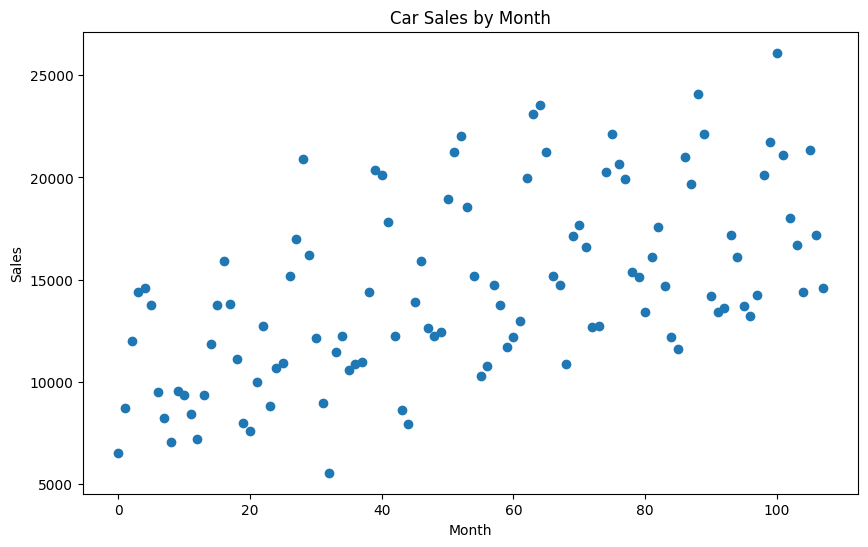

In [10]:
plt.figure(figsize = (10,6))
plt.scatter(df['period'],df['sales'])
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

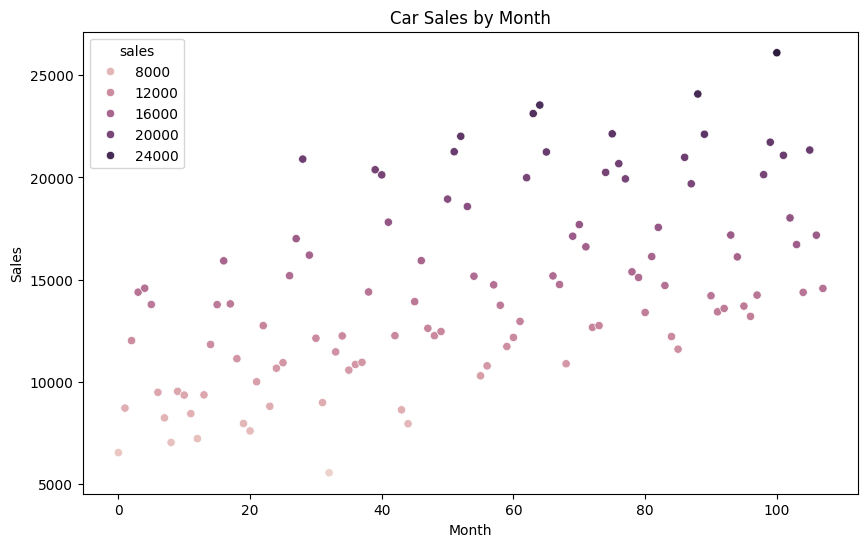

In [11]:
#The one i made -
plt.figure(figsize = (10,6))
sns.scatterplot(df, x= df['period'], y = df['sales'], hue = 'sales')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

## Performing Linear Regression
Linear Regression is a method which is used to find the relationship between a dependent variable and one or more independent variables by modelling it in a straight line. <br>
The most common thing in this pattern is the gradual increase from <b>Left</b> to <b>Right</b>. <br>
<i>Linear Regression allows us to pull order from the chaos</i> <br>
The chaos here are the car sales in Quebec, where seasonal variations, time trends and randomness mingle together in a noisy dataset.  <br>
1) As we remove the randomness between the relation of two variable, the regression line show us the general trend. <br>
2) We often say that the regression line <i>fits the data</i> when the line goes from between the cloud of data. <br>

## Code Guideline(s) - 
The methods we use for Linear Regression are very particular about the shape of the data, Here particularly the code would run smoother if our data is stored in the shape of 108 Rows of 1 List each. <br>
We use the function reshape()

In [12]:
df['sales']

0       6550.0
1       8728.0
2      12026.0
3      14395.0
4      14587.0
        ...   
103    16722.0
104    14385.0
105    21342.0
106    17180.0
107    14577.0
Name: sales, Length: 108, dtype: float64

In [13]:
x = df['period'].values.reshape(-1,1)
y = df['sales'].values.reshape(-1,1)

In [14]:
#We can perform Linear Regression from the right module.
from sklearn.linear_model import LinearRegression

In [15]:
regressor = LinearRegression()
regressor.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### StepsAbove^
We import Linear Regression capability from scikit-learn package (sklearn). It provides numerous Machine-Learning capabilities, <i>Linear Regression</i> is one of them. <br>
<b><i>Fit()</i></b> function - We are telling it to calculate a line which FITS the data by matching its location and general trend. <br>
A quantitative way to describe it would be, what <i>really fits our regression</i>, determining precise and optimized values for two numbers : A coefficient and an intercept. After running the preceding snippet, we can look at the numbers as follows -
regressor.coef_
regressor.intercept_

# # Applying Algebra and Linear Regression 
Linear Regression is a method used to find the best-fitting line for a set of data. The line summarizes the general trend <br>
The function fit(x,y) returns two variables, coefficient and intercept. <br>
Coefficient → slope of the line (m) [.coef_] <br>
Intercept → starting height of the line (b) [.intercept_] <br> 
Intercept is the value of y, when x = 0  [Where the line crosses the y-axis] <br>
## Pointers -
<i> We can also think of every point on that line as a prediction of how many car sales are expected at each time period, ignoring the randomness and noise. </i> <br>
## Interpretations -
The interpretation of line slope, 81.2. Is the monthly growth trend of car sales, We conclude that the car sales grow about 81.2 Cars/Month. Despite the randomness, Growth of 81.2 remains. <br>

--

Now even though the line looks fine but its natural to wonder how out regressor determined the values 81.2 and 10250.8. Therefore, this is not the only line that we can draw over our cloud of points. A literal infinite amount of lines can pass through our cloud of data. Example - We might hypothesize that the following line is a better approximation of the relationship between sales and timeperiod. <br>
<center><i>sales = 125. x + 8000</i></center> <br> 
This is a <b><i>Hypothesized Line</i></b>. If we use it to model our data, we have a new <i>m</i> and <i>b</i>. Now lets plot our regression line and hypothesized line together.


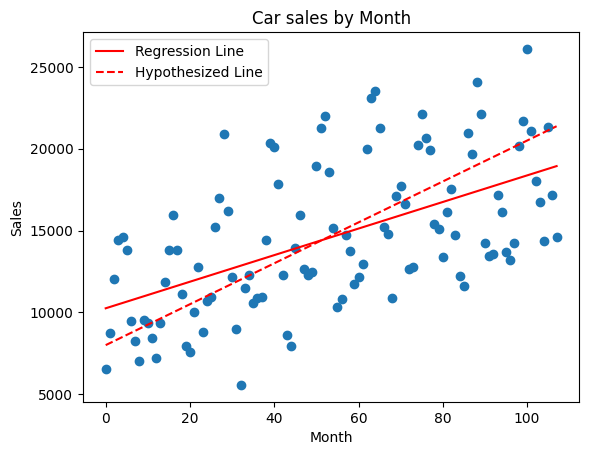

In [16]:
plt.scatter(df['period'], df['sales'])
plt.plot(df['period'], [81.2 * i + 10250.8 for i in df['period']], 'r-', label = 'Regression Line')
plt.plot(df['period'], [125 * i + 8000 for i in df['period']], 'r--', label = 'Hypothesized Line')
plt.legend(loc = "upper left")
plt.title("Car sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

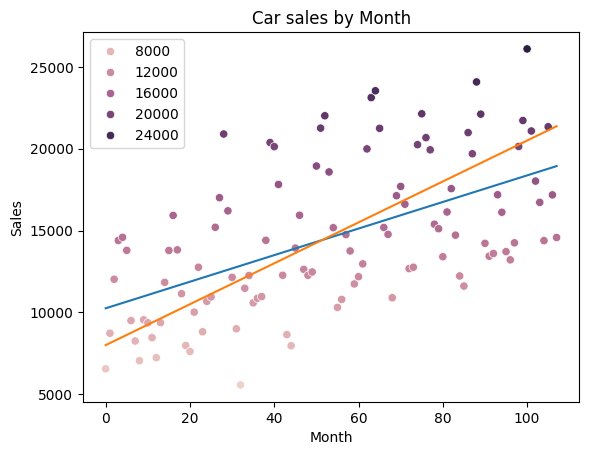

In [17]:
#Plotting the same with seaborn-
sns.scatterplot(df,x = df['period'], y = df['sales'], hue= 'sales')
sns.lineplot(df, x = df['period'], y= [81.2 * i + 10250.8 for i in df['period']])
sns.lineplot(df, x = df['period'], y= [125 * i + 8000 for i in df['period']])
plt.title("Car sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

## NOTE - 
Given both lines show a reasonable upward trend and both could be said to be fit for the data. Why does our regressor fit produces only one output(line)? <br>
<b>Because</b> the regression line output by the linear regression process is supposedly the <i>line of best fit</i>. <br>
<b>BUT</b> What enables us to say that it fits better than any <i>other line</i>?

# Calculating Error Measurements 

We can find out the goodness of fit for any line by measuring regression errors also called <i>residuals</i>. <br>
As we have already established that we interpret each point of a regression line as our prediction of what value we expect in our data. A regression line is a good fit for the data, meaning it is gets close to most of the illustrated points. In order to measure the error, we can calculate the vertical distance between the data point and the regression line. <br>
Quantifying / Calculating the error relative to each data point help us identify the best line of fit. The line with low errors fit the data well and line with high error fits the data poorly. <br>
<b>First</b>, let us calculate those error measurements. We will calculate each point of the lines we're interested in and compare them to each data point in our dataset.

In [18]:
saleslist = df['sales'].tolist()
regressionline = [81.2 * i + 10250.8 for i in df['period']]
hypothesizedline = [125 * i + 8000 for i in df['period']]
error1 = [(x-y) for x,y in zip(regressionline, saleslist)]
error2 = [(x-y) for x,y in zip(hypothesizedline, saleslist)]

### Description
The variables regressionline and hypothesized line contains all the values on the line. <br>
to calculate how far are these numbers from the actual sales, we create two variables error1 and error2.

In [19]:
print(error1)
print(error2)

[3700.7999999999993, 1604.0, -1612.800000000001, -3900.6000000000004, -4011.4000000000015, -3134.2000000000007, 1240.0, 2568.199999999999, 3851.3999999999996, 1436.5999999999985, 1698.7999999999993, 2688.0, 3988.199999999999, 1932.3999999999996, -449.40000000000146, -2315.2000000000007, -4376.0, -2189.800000000001, 569.3999999999996, 3818.5999999999985, 4264.799999999999, 1941.0, -721.8000000000011, 3302.3999999999996, 1522.5999999999985, 1333.7999999999993, -2838.0, -4566.800000000001, -8375.6, -3599.4000000000015, 543.7999999999993, 3771.0, 7281.199999999999, 1456.3999999999996, 755.5999999999985, 2509.7999999999993, 2312.0, 2290.199999999999, -1068.6000000000004, -6961.4000000000015, -6629.200000000001, -4236.0, 1393.199999999999, 5100.4, 5861.5999999999985, -27.200000000000728, -1950.0, 1439.199999999999, 1881.3999999999996, 1759.5999999999985, -4633.200000000001, -6867.0, -7541.799999999999, -4026.6000000000004, -539.4000000000015, 4410.799999999999, 4006.0, 127.20000000000073, 12

These variables contain a list of 108 different measurements of how far these lines are from the raw data. Looking at the whole data at once is difficult <b>but</b> we can simply boil the error down to just one number.

In [20]:
import numpy as np

error1ab = [abs(value) for value in error1]
error2ab = [abs(value) for value in error2]
#So what does abs() function do? An Absolute value refers to the non-negative distance of a number from 0.

print(error1ab)

[3700.7999999999993, 1604.0, 1612.800000000001, 3900.6000000000004, 4011.4000000000015, 3134.2000000000007, 1240.0, 2568.199999999999, 3851.3999999999996, 1436.5999999999985, 1698.7999999999993, 2688.0, 3988.199999999999, 1932.3999999999996, 449.40000000000146, 2315.2000000000007, 4376.0, 2189.800000000001, 569.3999999999996, 3818.5999999999985, 4264.799999999999, 1941.0, 721.8000000000011, 3302.3999999999996, 1522.5999999999985, 1333.7999999999993, 2838.0, 4566.800000000001, 8375.6, 3599.4000000000015, 543.7999999999993, 3771.0, 7281.199999999999, 1456.3999999999996, 755.5999999999985, 2509.7999999999993, 2312.0, 2290.199999999999, 1068.6000000000004, 6961.4000000000015, 6629.200000000001, 4236.0, 1393.199999999999, 5100.4, 5861.5999999999985, 27.200000000000728, 1950.0, 1439.199999999999, 1881.3999999999996, 1759.5999999999985, 4633.200000000001, 6867.0, 7541.799999999999, 4026.6000000000004, 539.4000000000015, 4410.799999999999, 4006.0, 127.20000000000073, 1206.3999999999996, 3303.5

In [21]:
# Finding the MAE (Mean Absolute Error)
print(np.mean(error1ab))
print(np.mean(error2ab))

3154.3592592592595
3239.777777777778


### Mean Absolute Error (MAE)
The mean of all the absolute values of our error measurements. <br>
This error is just the average vertical distance between a line and the points in a dataset. A line that gets very close to the points in a dataset will have a low MAE and a line that is far from most points will have a higher MAE. <br>
The <b>MAE</b> is a reasonable way to express the degree of <i>goodness of fit</i>. Lower the MAE the better fit is tehe line. <<br>
### Interpretation - 
The MAE has an easy interpretation, Its the <i>average error</i> we expect to have if we use a particular line for prediction. <br>
When we say that MAE for our regression line is 3154.4, we mean that if we use this regression line to make predictions. We expect our predictions to be wrong by about 3154 on average. <br>
<b>For Example</b>: Suppose we predict that three months from now, we will sell exactl 20,000 cars. We wait three months and find out that we sold 23,154 cars exactly. Our prediction is wrong and we underestimated the sales by 3,154. So, the size of our prediction error tells us exactly how imperfect we are. <br>

<b> NOTE </b> : MAE is <i>not</i> the only measurement that indicates how well a line fits a dataset.

### RMSE (Root Mean Squared Error)
On one hand where MAE tells us <i>"Overall, heres the average mistake"</i>, on the other hand we also have <b>RMSE</b> which punishes the system for large error and tells us <i>"This system makes large errors sometimes</i>. <br>
in RMSE, The values are squared which stops the negative values from cancelling out the positive ones and also amplifying the effect of <b>Large Errors</b> and then are square rooted. <br>
<i>The Code</i>-

In [22]:
error1squared = [(value)**2 for value in error1]
error2squared = [(value)**2 for value in error2]

rmserror1 = np.sqrt(np.mean(error1squared))
rmserror2 = np.sqrt(np.mean(error2squared))
print(f"The RMSE for our regression line is : {rmserror1}")
print(f"The RMSE for our hypothesized line is : {rmserror2}")

The RMSE for our regression line is : 3725.491219512759
The RMSE for our hypothesized line is : 3968.900519455399


It is not a surprise that the ERROR in our regression line is lower than the error in our hypothesized line. The fit(x,y) method uses the calculations invented by Adrien-Marie Legendre in the backend.<br>
<b>Mathematically</b>, The line who's coef_ is determined by fit / Legendre's method is guaranteed to have a lower RMSE, in other words the <i>line of best fit</i>.

In [23]:
#We can also create simple Python functions that perform the calculations of MAE and RMSE - 
def get_mae(line, actual):
    error = [(x-y) for x,y in zip(line,actual)]
    errorabs = [abs(value) for value in error]
    mae = np.mean(errorabse)
    return(mae)

def get_rmse(line, actual):
    error = [(x-y) for x,y in zip(line,actual)]
    errorsquared = [(value)**2 for value in error]
    rmse = np.sqrt(np.mean(errorsquared))
    return(rmse)

# FORECASTING TRENDS
## Using Regression
So far, we've only used Linear Regression to find the best fit line (trend), But all our data is from the past.<br>
<i>Going</i> from a Linear Regression to a <i>forecast</i> is simple: We just need to <b>extrapolate</b>. [<i>Extrapolation</i>: Process of estimating a value or a trend, beyond the original range of observed data (<i>based on the established trend,pattern</i>)] <br>

Our regression line stops at the edges of our plot, month 0  to month 107. But there's no reason for it to stop, with the same slop and intercept we can predict values for further months.


In [24]:
x_extended = np.append(df['period'], np.arange(108,116)) 
#numpy.append(arr, values, axis=None) ; arr = Values are appended to a copy of this array. ; values = These values are appended to a copy of arr. and also must be the same shap as the arr.
x_extended = x_extended.reshape(-1,1)
extended_prediction = regressor.predict(x_extended)


## Note - 
<b>Predict() uses the relationship learned during fit(). <br>
x_extended just supplies new X values to plug into that relationship. <br>
You cannot predict before training.</b> <br>

<i>Now, we have the forecast values. These prediction follow a common pattern, each predicion is 81.2 higher than the previous one. This is because 81.2 is the <b>slope</b> of our regression line. Remember, 81.2 is not just the slope of the line but also the size of the increase we expect in car sales every month ignoring the randomness and seasonal variation.</i> <br>
Although the prediction method used here is helpful, we don't really need it because we can get values for as long as we want by plugging numbers into our regression equation - <br>
<center>carsales = 81.2 . period + 10250.8</center>


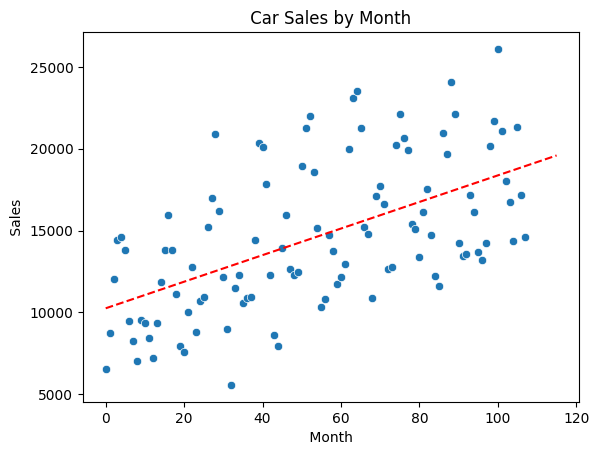

In [25]:
#graph
sns.scatterplot(df, x= df['period'], y= df['sales'])
plt.plot(x_extended, extended_prediction, 'r--')
plt.title(' Car Sales by Month ')
plt.xlabel(' Month ' )
plt.ylabel(' Sales ' )
plt.show()


### About the plot --
The plot is quite similar to previous plots and it is supposed to. The only difference is that we have extended our regression line out for a few more periods to the right to see what car sales we expect and that is how we forecast it in the near future. This extrapolation is a simple and effective way to forecast. <br>
We've accomplished forecasting with Linear Regression but there are more things that we can do to improve our forecasts, In future sections we talk about ways to evaluate and improve the performance of our forecasts.

# Trying more regression Models -
The linear regression we did in the previous sections is a simple kind called <i><b>Univariate Linear Regression</b></i>. This type only uses <i>one variable</i>, which in our case was <b>period</b> to predict(sales). Using only one variable is advantageous, its <i>easy</i>,<i>simple</i> and a <i>straight</i> line. <br>
Exploring more options - <br>

## Multivariate Linear Regression 
The details of multivariate Linear Regression are essentially the same as univariate linear regression; The only difference is the <b>number</b> of variables we use for <i>prediction</i>. <br>
We can use variables like <i>GDP, Growth Rates, Population Estimates, Car Prices, Inflation or </i> anything else that we want. <br>
We are limited atm because our dataset doesn't contain any of those variables. We will use (period)**2 [#NOTE: To teach the model how to curve, otherwise Linear Regression only draws straight lines]. <br>
Previously we also found the curve and the intercept (m and b). <br>
<center>y = m.x + b</center>
Now that we are using 3 Variables for prediction (<i>x1,x2,x3</i>) we also need to find <i>m1,m2,m3</i>. <br>
<center>y = m1.x1 + m2.x2 + m3.x3 + b</center>
We will be using (period)**2 and (period)**3 to predict car sales in our regression. <br>
carsales = m1.period + m2.period**2 + m3.period**3 + b <br>

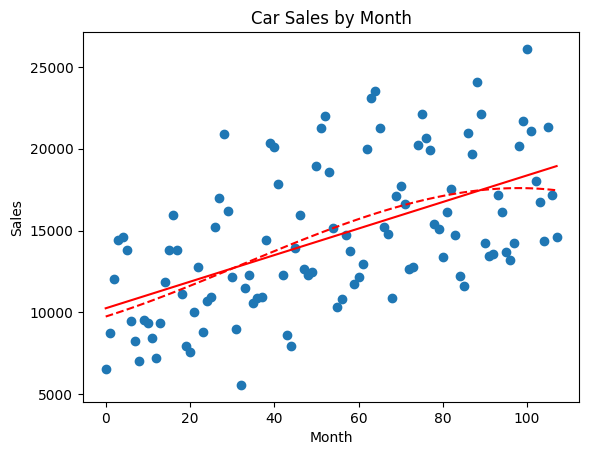

In [26]:
df['quadratic'] = df['period'].apply(lambda x: x**2)
df['cubic'] = df['period'].apply(lambda x: x**3)
x3 = df.loc[:, ['period','quadratic','cubic']].values.reshape(-1,3)
y = df['sales'].values.reshape(-1,1)

regressor_cubic = LinearRegression()
regressor_cubic.fit(x3,y)
plt.scatter(df['period'], df['sales'])
plt.plot(x, regressor.predict(x), 'r-')
plt.plot(x, regressor_cubic.predict(x3), 'r--')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

Two variables quadratic (period)**2 & cubic (period)**3. <br>
<b>Reshaping</b>: Reshape into an array with 108 Rows where each row is a list of the values of the three variables for a particular month. As long as data is in the right shape, fit(x,y) works. <br>
Although Linear Regression was originally designed to work with <i>straight lines</i>, we can also use it to find best-fit curves and non-linear functions like cubic polynomial. <br> 
Be it a best-fit line or a best-fit curve, the methods we use are the same. Infact the new curve stays very close to the straight line. With different variables, our output will always differ but it will always fit the data. 


In [27]:
print(regressor_cubic.coef_)
print(regressor_cubic.intercept_)

[[ 8.13410634e+01  7.90279561e-01 -8.19451188e-03]]
[9746.41276055]


The output enables us to fill in all the variables to get an equation for estimating car sales using cubic polynomial of the period:
<center>carsales = 81.34.period + 0.79.period**2 - 0.008.period**3 + 9746.41</center>
Our straight line from univariate regression continues to increase by 81.2. By contrast, the curved line from multivariate regression begins to curve downward on the right side of the plot. <br>
Although, both lines behave differently and are the result of the same process (<i>linear regression</i>). Both make opposite predictions about the future. <br>
Next, we discuss how to choose, which regression line is the best for forecasting.

# Using Trignometry to Capture Variations -
There is no limit to the number of variables that we can add to a multivariate regression. Each selection of variables leads to a curve with slightly different shape. So, the <i>challenge</i> is, which variables to add to the regression? <br>
In this case, the univariate regression line and the cubic regression line are both acceptable and can be used to forecast the future. However, though they both pass through what looks like the middle of our cloud points, <b>there is alot of variation that they fail to capture</b>. <br>
-- sales for individual months are much higher/lower than these lines. <i>ideally</i>, We could find a collection of variables, when fit using Linear Regression, lead to a curve that better fits some of this variation. However, in this case one small change to the way we plot our data can make what we should do next clearer. <br>
Using a lineplot instead of a scatterplot 

plt.plot >

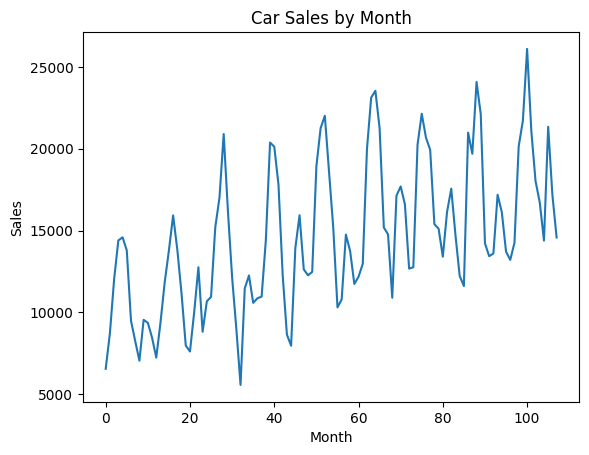

In [28]:
plt.plot(df['period'], df['sales'])
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

This new plot shows the same data, plotted as a line rather than a collection of points. In this way, the noisy ups and downs of monthly sales become much more clearer and ordered compared to a scatterplot. <br>
Our data includes nine years of sales figures and exactly nine major peaks are apparent in the contour of the line plot. What earlier looked random, now looks predictable, every summer there is a peak in sales with a corresponding trough every winter. [<i>Data comes from Quebec, where very cold winters are associated with lower activity levels</i>] <br>
The way the number of car sales goes up and down during a year is similar to the mathetmatical function. The periodic increase and decrease look like trigonometric curve, like a sine or cosine curve. <br>

<b>In a trignometric regression-  y= a.sin(x) + b.cos(x) + c.period + d</b>
Sin/Cos produce waves, the waves are equivalent to patterns that seasonality creates, with sin/cos the model is able to cycle and therefore we use them with regression.

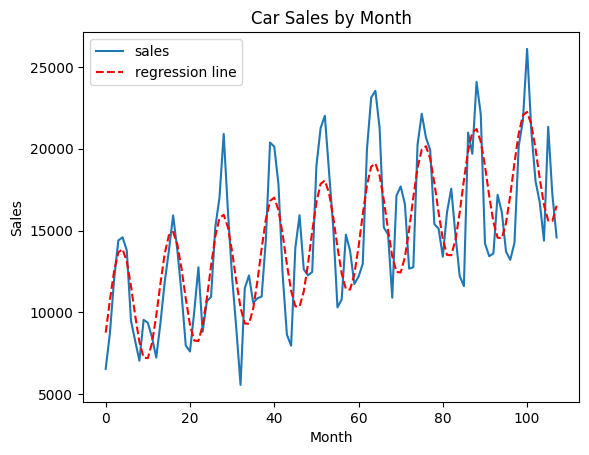

In [29]:
import math
df['sin_period'] = df['period'].apply(lambda x: math.sin(x*2*math.pi/12))
df['cos_period'] = df['period'].apply(lambda x: math.cos(x*2*math.pi/12))
#fit(x,y) x are the inputs [variables, period**2, period**3, temperature, size] and y are the outputs sales, rentals, price.
#next it tries to find the best value for slope and intercept w.r.t to x,y
x_trig = df.loc[:, ['period', 'sin_period', 'cos_period']].values.reshape(-1,3)
y = df['sales'].values.reshape(-1,1)

regressor_trig = LinearRegression()
regressor_trig.fit(x_trig, y)

plt.plot(df['period'], df['sales'], label = "sales")
plt.plot(x, regressor_trig.predict(x_trig), 'r--', label = "regression line")
plt.legend()
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()



In this snippet, We have defined the sine and cosine transformations of the <i>period variable</i>. Then we fit a regression that uses these new variables as predictors. The regression line that relies on trignometric functions seem to fit the data especially well. Follows the same trend as well, seems to go up during yearly peaks and down during the yearly troughs, staying close to the real sales number.<br>
<b>We can also verify</b> that by calculating the RMSE and comparing it with the straight line.

In [30]:
trig_line = regressor_trig.predict(x_trig)[:, 0]
print(get_rmse(trig_line, saleslist))

2680.5520744410464


The RMSE we get as output is by far the lowest and it is not a coincidence that trigonometric functions enable us to fit the data well. In fact, increase and decrease in temperature during seasons on our planet are due to a change in the angle of the Earth during its revolution around the sun. The change in the angle of the Earth with respect tothe sun follows a curve that is like a sine curve, and therefore temperature changes throughout each year also follow sine-line curves. If car sales are reacting to winter and summer weather changes due to temperature, it makes sense that they would also follow sine-like curves. Regardless of whether we found the trigonometric model by blind chance, by looking at our scatterplot or because we know about the astronomy of the Earth's rotation around the sun, it appears that we found a regression curve that fits the data well.

# Choosing the best Regression for Forecasting! ~
According to our observations, it is quite evident that the line that includes terms for the sine and cosine of the period seem to fit the data pretty well. Fitting refers the dashed line getting close to the solid line (qualitatively). Moreover, Quantitatively, the RMSE for the trigonometric line is lower than the RMSE for the other lines. <br>
However, the natural temptation is to keep looking for new regression specifications that have lower and lower RMSE's. <br>
<b>For Example</b>: Lets try a new regression specification that includes seven prediction terms to forecast sales and find the RMSE for that model.

In [31]:
df['squareroot'] = df['period'].apply(lambda x: x**0.5)
df['exponent15'] = df['period'].apply(lambda x: x**1.5)
df['log'] = df['period'].apply(lambda x: math.log(x+1))

x_complex = df.loc[:, ['period', 'quadratic', 'cubic', 'log', 'sin_period', 'cos_period', 'squareroot', 'exponent15', 'log']].values.reshape(-1,9)
y = df['sales'].values.reshape(-1,1)

regressor_complex = LinearRegression()
regressor_complex.fit(x_complex, y)

complex_line = [prediction for sublist in regressor_complex.predict(x_complex) for prediction in sublist]
print(get_rmse(complex_line, saleslist))

2610.3938122978852


<b>NOTE</b>: Flattening of the list, complex_line is a 2D Array. A list inside of a list and needs flattening out in order to pass in get_rmse(complex_line, saleslist) because Python needs a 1-D Array. <br>
There are <b>multiple</b> ways to flatten out (flatten/tolist) or using a for loop on sublist to extract the number out.

Naturally, it seems like a safe assumption that this is our best model yet and we should be using this model for forecasting. But, this apparently reasonable conclusion is not correct. <break>
The <i>approach</i> we have been taking to model selection has a problem. Right now, we have used past data to fit a regression line and judged how good that regression line is, based on how close it gets to past points (RMSE). <br>
Therefore, we have only used the <i>past</i> for fitting our line and judging its performance. In a real-world example we should be using the past data to fit our regression line but we should be using the future for judging its performance. <br>
When we are choosing the best regression line to use for forecasting, <i><b>we need to find a way to evaluate various regression lines based on their performance on future data.</b></i>But it is impossible because the future has not happened yet, so we can't ever have future data. But, there are few tweaks that we can make in our way we perform and evaluate regressions so that our measurements on past data gives us a good estimate of how they will perform in the future. <break>

# Process -
We split our full data set into two separate, mutually exclusive subsets. We can call one set as the <i>training set</i> which consists majority of our data and the other as <i>test set</i>. We will use only the training set to fit our regressions or in other words, <i>train</i> them. After fitting/training our regressions, we will use the test set to evaluate how good the regressions are, using metrics like RMSE, MAE. <br>
Our test set is from the past but as if its from the future.

In [38]:
x_complex_train = df.loc[0:80,['period', 'quadratic', 'cubic', 'log', 'sin_period', 'cos_period', 'squareroot', 'exponent15', 'log']].values.reshape(-1,9)
y_train = df.loc[0:80, 'sales'].values.reshape(-1,1)

x_complex_test = df.loc[81:107,['period', 'quadratic', 'cubic', 'log', 'sin_period', 'cos_period', 'squareroot', 'exponent15', 'log']].values.reshape(-1,9)
y_test = df.loc[81:107, 'sales'].values.reshape(-1,1)

regressor_complex.fit(x_complex_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
# Checking RMSE of several models on our test data -

x_train = df.loc[0:80, ['period']].values.reshape(-1,1)
x_test = df.loc[81:107, ['period']].values.reshape(-1,1)

x_trig_train = df.loc[0:80, ['period', 'sin_period', 'cos_period']].values.reshape(-1,3)
x_trig_test = df.loc[81:107, ['period', 'sin_period', 'cos_period']].values.reshape(-1,3)

regressor.fit(x_train, y_train)
regressor_trig.fit(x_trig_train, y_train)

complex_test_preds = [prediction for sublist in regressor_complex.predict(x_complex_test) for prediction in sublist]
test_predictions = [prediction for sublist in regressor.predict(x_test) for prediction in sublist]
trig_test_predictions = [prediction for sublist in regressor_trig.predict(x_trig_test) for prediction in sublist]


print(f"RMSE for standard model: {get_rmse(test_predictions, saleslist[81:107])}")
print(f"RMSE for complex model: {get_rmse(complex_test_preds, saleslist[81:107])}")
print(f"RMSE for trigonometric model: {get_rmse(trig_test_predictions, saleslist[81:107])}")

RMSE for standard model: 4115.614379193304
RMSE for complex model: 6006.01316402485
RMSE for trigonometric model: 3461.0823292599357


In [40]:
df


,month,sales,period,quadratic,cubic,sin_period,cos_period,squareroot,exponent15,log
0,1960-01,6550.0,0,0,0,0.000000,1.000000e+00,0.000000,0.000000,0.000000
1,1960-02,8728.0,1,1,1,0.500000,8.660254e-01,1.000000,1.000000,0.693147
2,1960-03,12026.0,2,4,8,0.866025,5.000000e-01,1.414214,2.828427,1.098612
3,1960-04,14395.0,3,9,27,1.000000,6.123234e-17,1.732051,5.196152,1.386294
4,1960-05,14587.0,4,16,64,0.866025,-5.000000e-01,2.000000,8.000000,1.609438
...,...,...,...,...,...,...,...,...,...,...
103,1968-08,16722.0,103,10609,1092727,-0.500000,-8.660254e-01,10.148892,1045.335831,4.644391
104,1968-09,14385.0,104,10816,1124864,-0.866025,-5.000000e-01,10.198039,1060.596059,4.653960
105,1968-10,21342.0,105,11025,1157625,-1.000000,3.185939e-15,10.246951,1075.929830,4.663439
106,1968-11,17180.0,106,11236,1191016,-0.866025,5.000000e-01,10.295630,1091.336795,4.672829
